# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [7]:
dados = pd.read_csv('demo01_tratada.csv')
dados.head()

,Unnamed: 0,sexo,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,0,0,1,1,1,1,58.832877,3.106849,1,0,0,0,2.0,0,1,1
1,1,1,0,2,1,2,1,52.356164,8.358904,1,0,1,1,1.0,0,0,1
2,2,0,0,1,2,1,1,46.224658,2.106849,1,1,1,1,2.0,0,1,1
3,3,1,0,1,3,1,1,29.230137,3.021918,1,0,0,0,2.0,0,1,0
4,4,1,0,1,1,1,1,27.482192,4.024658,1,0,1,0,2.0,0,0,1


In [8]:
y = dados['mau']
x = dados.loc[:,dados.columns != 'mau']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
#1
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [11]:
#2
clf = clf.fit(x_train,y_train)

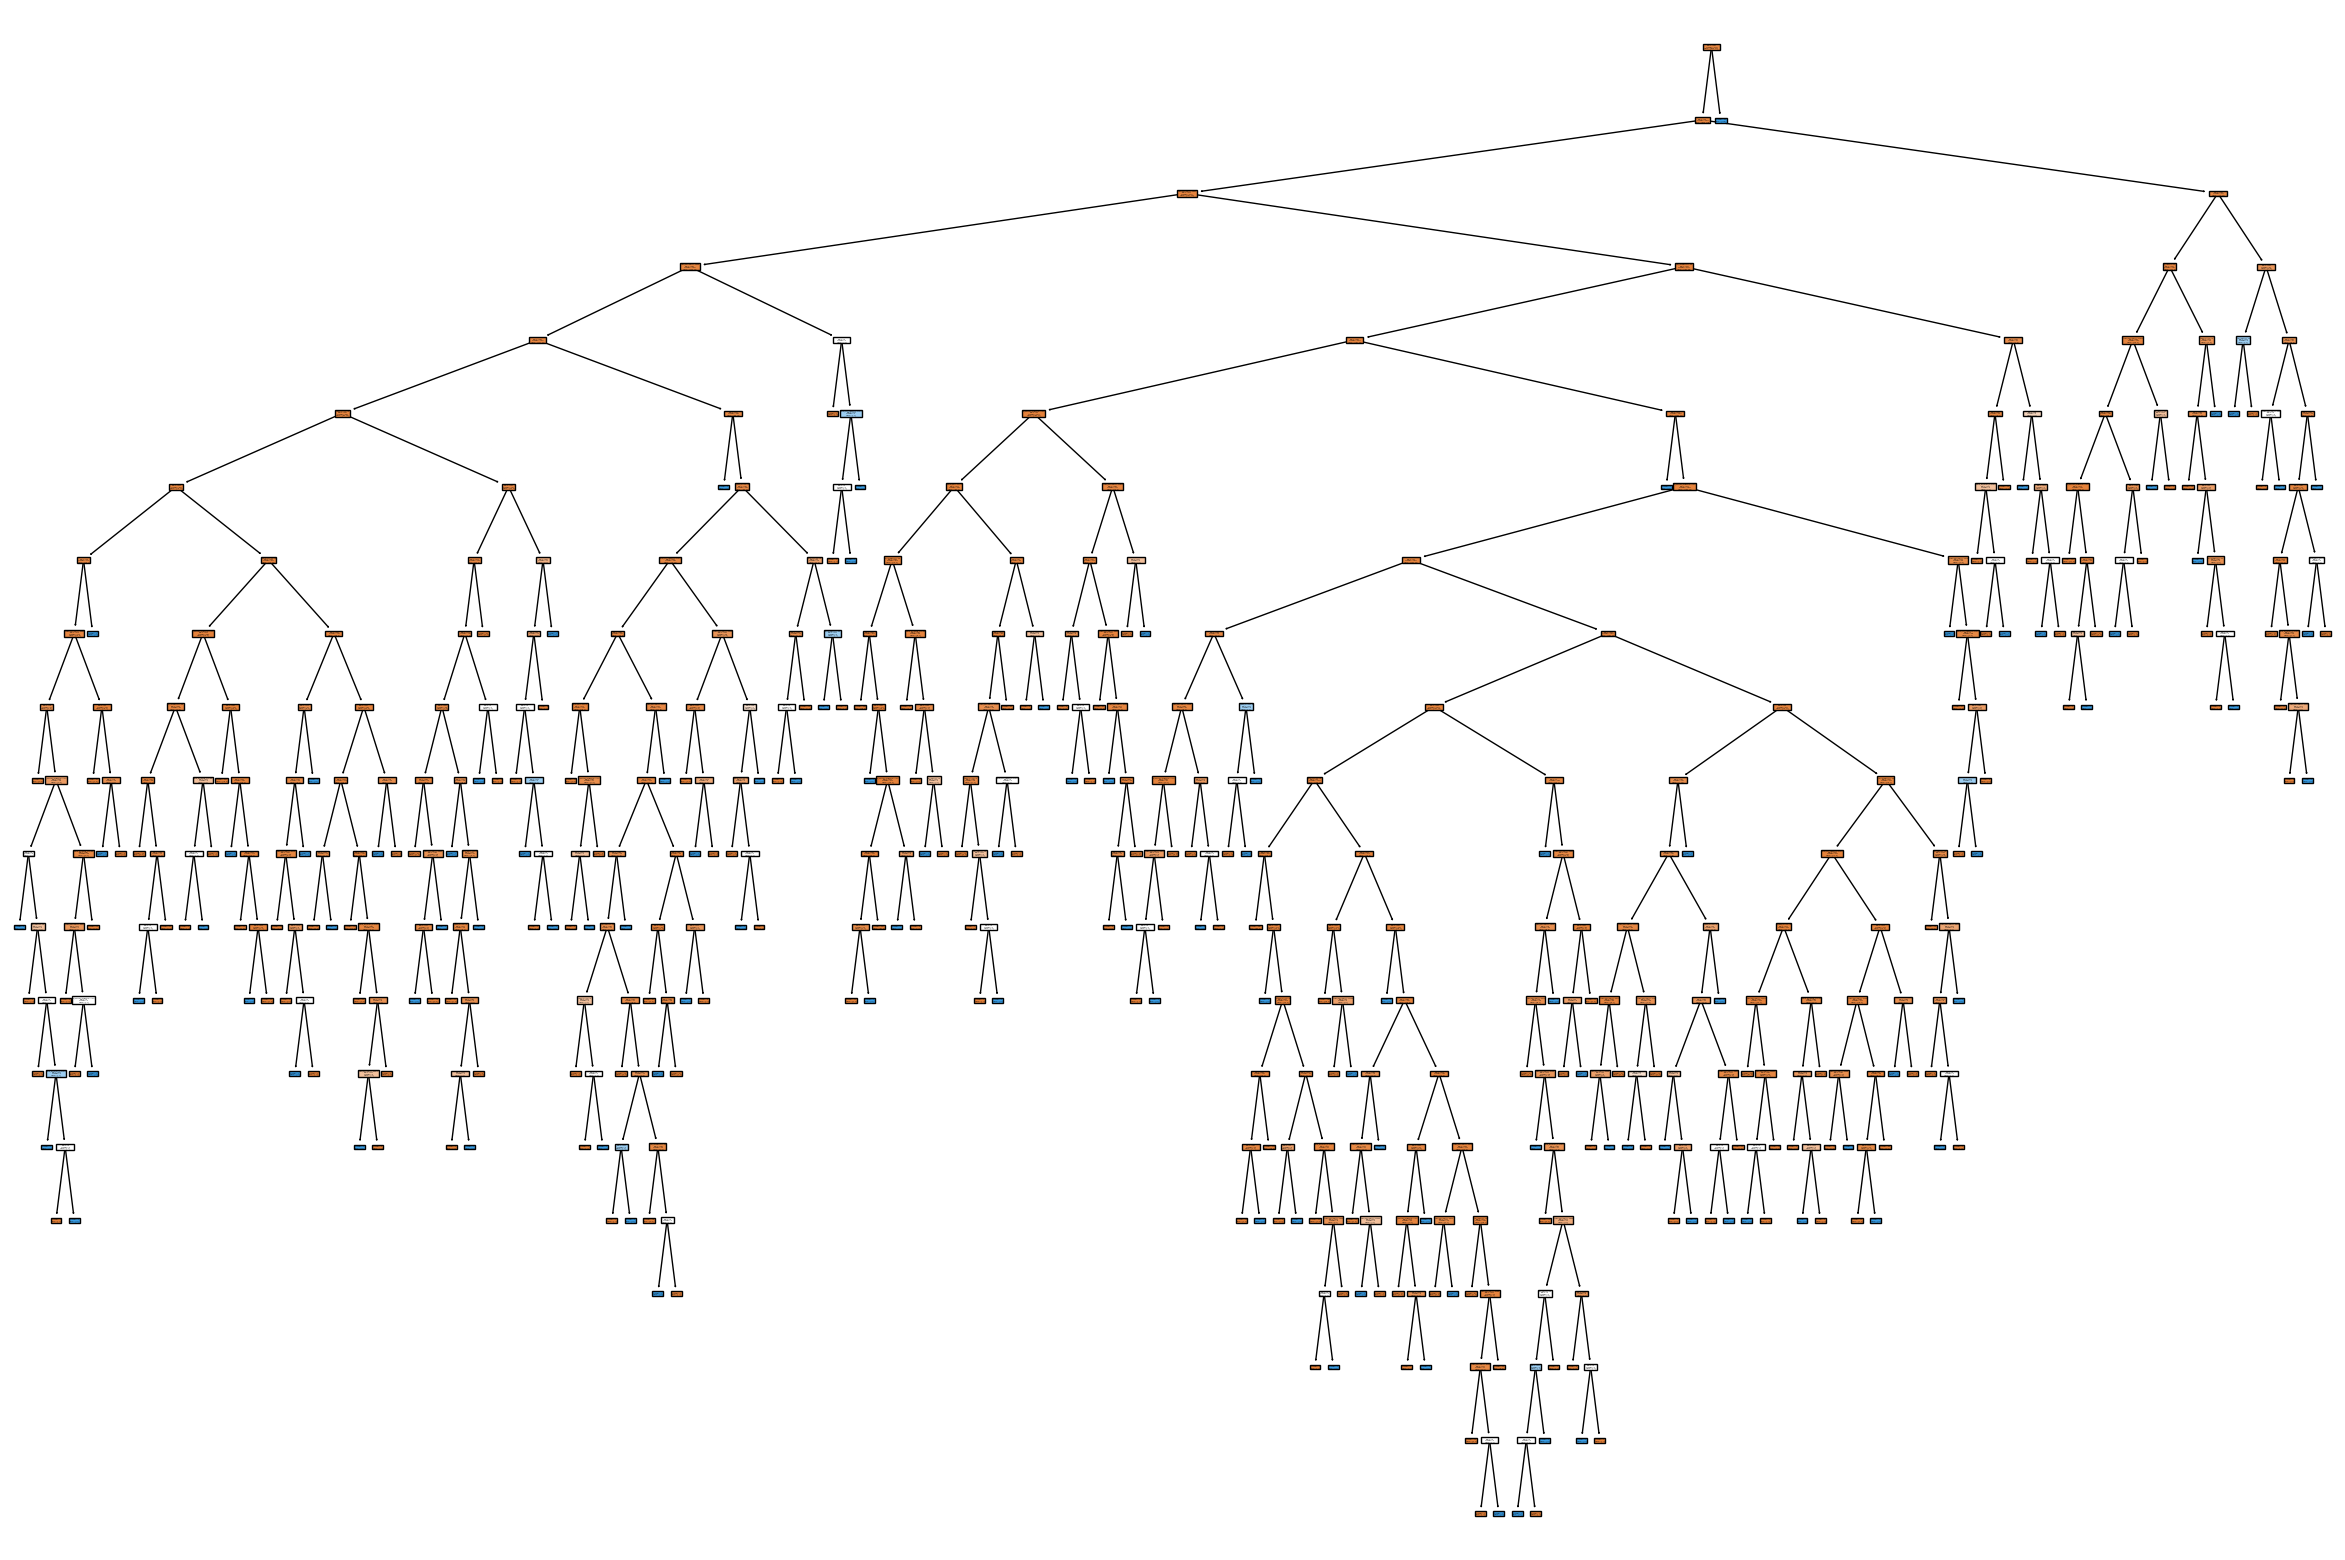

In [20]:
#3
plt.figure(figsize=(30, 20))
plot_tree(clf,
          filled=True,
          feature_names=x_train.columns);

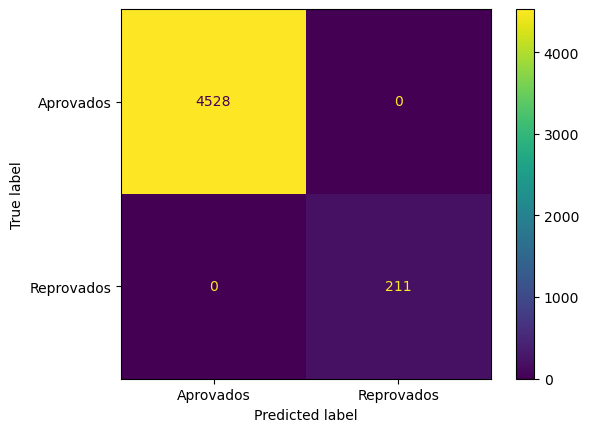

In [30]:
#4
ConfusionMatrixDisplay.from_estimator(clf, x_train, y_train, display_labels=['Aprovados', 'Reprovados']);

In [36]:
#5
predict = clf.predict(x_train)
accuracy_score(y_train, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [34]:
#1
y_chapeu_teste = clf.predict(x_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

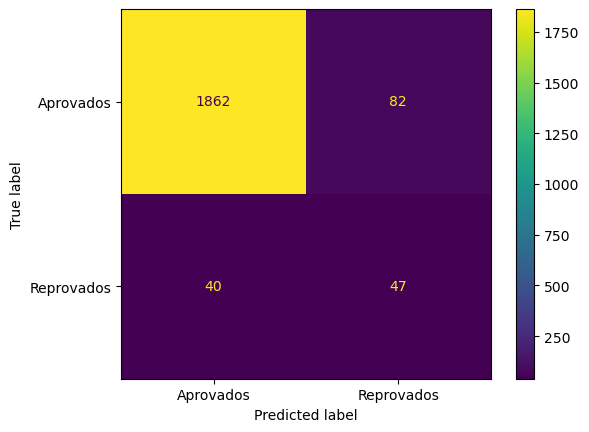

In [35]:
#2
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, display_labels=['Aprovados', 'Reprovados']);

In [37]:
#3
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.9399310684391925

Se comparada à acurácia da base de treinamento temos uma acurácia inferior, mas ainda assim em um valor bastante interessante.

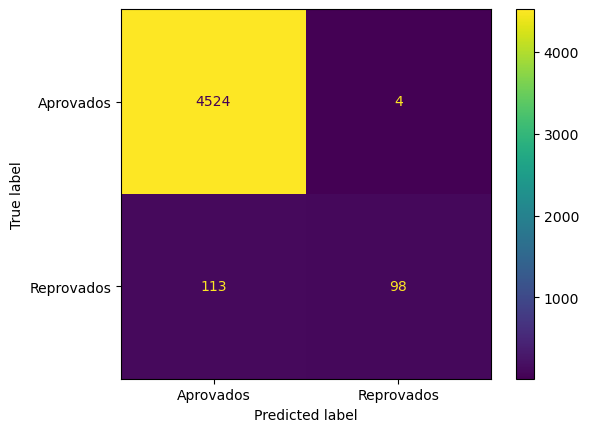

In [38]:
#4
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(x_train,y_train)
ConfusionMatrixDisplay.from_estimator(clf, x_train, y_train, display_labels=['Aprovados', 'Reprovados']);

In [39]:
#Proporção de maus
(113+98+4)/(4524+113+98+4)

0.045368221143701204

In [76]:
#5
y2 = y_train
y2 = [0 if item == 1 else item for item in y2]
y2 = pd.DataFrame(y2)

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(x_train,y2)

predict = clf.predict(x_train)
accuracy_score(y2, predict)

1.0

Como esperado, ao alterar a variável resposta para 'bons' em todos os registros, se tem uma acurácia de 100%, afinal não há variação do resultado conforme as variáveis independentes são alteradas.